### Lib imports

In [ ]:
import numpy as np
import pandas as pd
import glob
import multiprocess
from custom_classes import *

## Building and Processing Data
We use a pool to speed processing time with parallelization 

In [ ]:
FileTargets = glob.glob('./../data/*.csv')

def pooled_df_building(target:str) -> pd.DataFrame:
    df_build = DataFrameBuild(csv_file_path=target)
    return df_build.build_dataframe(save=True,force=False,verbose=True)

pool = multiprocess.Pool(multiprocess.cpu_count())
results = [pool.apply(pooled_df_building, args=(target,)) for target in FileTargets]
list_of_dataframes = [r for r in results if r is not None]
pool.close()
pool.join()

### Example
Bellow we had two measurements and we decided to plot them on two distinct days (#1 and #15).

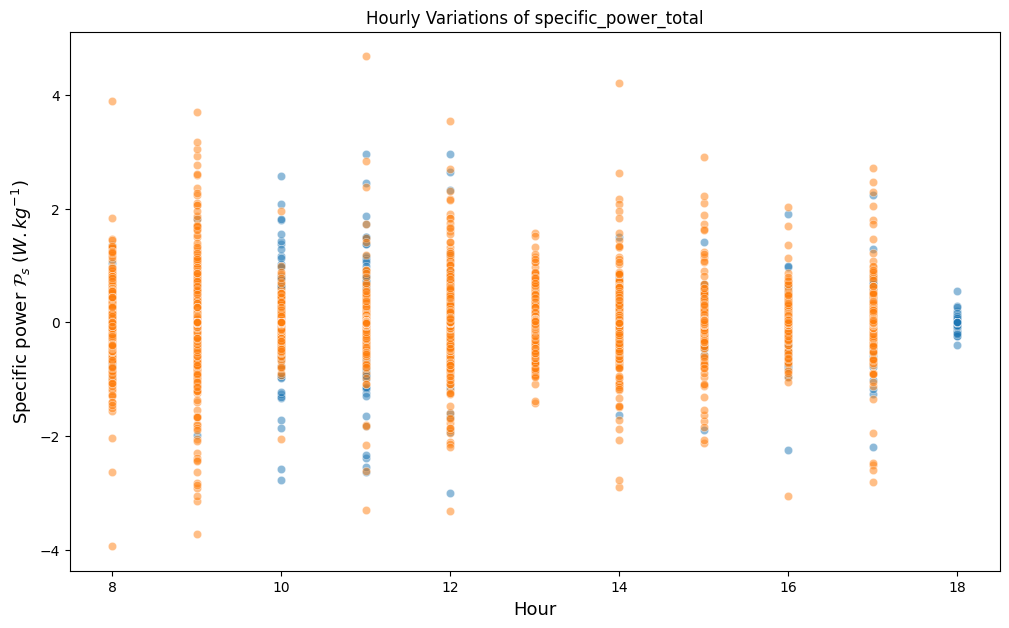

In [23]:
plotter = PlotTool(list_of_dataframes)
plotter.plot_hourly_power(unique=True,day_number=1)
plotter.plot_hourly_power(unique=True,day_number=15)
plotter.plot()